<a href="https://colab.research.google.com/github/Benjamin-morel/TensorFlow/blob/main/06_convolution_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


# Machine Learning Model -  CIFAR dataset - Convolutional Neural Network (CNN)

| | |
|------|------|
| Filename | 06_convolution_CNN.ipynb |
| Author(s) | Benjamin Morel (benjaminmorel27@gmail.com) |
| Date | September 10, 2024 |
| Aim(s) | Classify images with a simple convolutional neural network |
| Version | Python 3.12 |


<br> **!!Read before running!!** <br>
1. Frames have been intentionally hidden. Please reopen them to see the code.
2. Fill input frame, run all and read comments.

Models present in this script have been already trained and saved. You can either load these backups or re-train the model (useful when you want to optimize or change a parameter, but beware of calculation times).

In [ ]:
load_model = 'No' # Load previous trained models Yes or No



---


## 1. Import libraries & prebuilt dataset

This Python script builds a **convolutional neural network** (CNN) and trains it to classify images. The objective is to classify images of transport and animals from the CIFAR database [[1]](https://www.cs.toronto.edu/~kriz/cifar.html). For this, a serie of **convolution blocks** with a **max pooling** layer are added to a neural network. Finally, an **overfitting** example is shown at the end of the script and methods to avoid it are explained.

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import tensorflow as tf # tensor manipulation + machine learning models
import plotly.express as px # graphing packages
import plotly.graph_objects as go # graphing packages
from plotly.subplots import make_subplots # subplot ability
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib


**Comments**
<br> CIFAR dataset is composed of 60,000 **color images labeled** in 10 categories: airplaine, car, brid, cat, deer, dog, frog, horse, ship and truck. These images are composed of 32x32 pixels and a triplet of values defining the **rgb code** is associated with each pixel. Values of rgb code are between 0 and 1 after the **normalization step**.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0 # normalize pixel values (between 0 and 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = px.imshow(train_images[:10, :, :], facet_col=0, binary_string=False) # plot an example of the first 10 training data
for i, label in enumerate(train_labels[:10]): # label of the training data
    fig.layout.annotations[i]['text'] = '%s' %class_names[train_labels[i][0]]
fig.update_layout(margin=dict(l=10, r=10, t=100, b=100), width=1000, height=300)
fig.update_yaxes(visible=False, showticklabels=False), fig.update_xaxes(visible=False, showticklabels=False), fig.update(layout_coloraxis_showscale=False)
fig.show()

## 2. Convolution neural network model and training phase

**Comments**
<br> The neural network model is composed of 2 stacks of `Conv2D` + `MaxPolling2D` layers and fully connected layers `Dense`. Size of inputs/outputs:


*   start: input = image 32x32 with 3 values per pixel (= rgb code).
*   convolution layer 1: output = 30x30x32 (32 = number of filter used).
*   max-pooling layer 1: output = 15x15x32 (15=30/2 because pool size is 2x2).
*   convolution layer 2: output = 13x13x64 (32 extra filters).
*   max-pooling layer 2: output = 6x6x64
*   convolution layer 3: output = 4x4x64
*   flatten layer: output = tensor rank 1 of 4x4x64=1024 elements

In [ ]:
if load_model == 'No':
  model = tf.keras.models.Sequential() # empty model in which layers defined after are stacked
  model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # 2D convolution block with 32 different filters of 3x3
  model.add(tf.keras.layers.MaxPooling2D((2, 2))) # max-pooling layer with a pool size of 2x2 to reduce spatial dimension of the output.
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2)))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(10))

  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

  model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
if load_model == 'No':
  checkpoint_path = "training_image_recognition_06_transport_animal/cp.weights.h5"
  checkpoint_dir = os.path.dirname(checkpoint_path)
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weights_only = True, verbose = 1)

  history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3466 - loss: 1.7651
Epoch 1: saving model to training_image_recognition_06_transport_animal/cp.weights.h5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.3467 - loss: 1.7650 - val_accuracy: 0.5555 - val_loss: 1.2463
Epoch 2/10
1552/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5721 - loss: 1.2026
Epoch 2: saving model to training_image_recognition_06_transport_animal/cp.weights.h5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5722 - loss: 1.2023 - val_accuracy: 0.6047 - val_loss: 1.1512
Epoch 3/10
1549/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6340 - loss: 1.0394
Epoch 3: saving model to training_image_recognition_06_transport_animal/cp.weights.h5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6341 - loss: 1.0392 - val_accuracy: 0.6432 - val_loss: 1.0064
Epoch 4/10
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6738 - loss: 0.9334
Epoch 4: saving model to traini

In [ ]:
model1 = tf.keras.models.Sequential() # empty model in which layers defined after are stacked
model1.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # 2D convolution block with 32 different filters of 3x3
model1.add(tf.keras.layers.MaxPooling2D((2, 2))) # max-pooling layer with a pool size of 2x2 to reduce spatial dimension of the output.
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dense(10))

model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.7038 - loss: 0.9078


In [ ]:
checkpoint_path

'training_image_recognition_06_transport_animal/cp.weights.h5'

In [ ]:
if load_model == 'No':
  model.save_weights(checkpoint_path)
else:
  model1.load_weights(checkpoint_path)

In [ ]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - 6ms/step - accuracy: 0.0998 - loss: 2.3031


In [ ]:
# !mkdir -p saved_model
# model.save('image_classification.h5')

## 3. Evaluation

In [ ]:
fig = go.Figure(data=[go.Scatter(x=np.linspace(1,10,10), y=history.history['accuracy'], mode='lines', name="training"),
                      go.Scatter(x=np.linspace(1,10,10), y=history.history['val_accuracy'], mode='lines', name="validation")])
fig.update_layout(width=500,
                  height=500,
                  font_family="Times New Roman",
                  font_color="black",
                  xaxis_title="Epoch",
                  yaxis_title="Accuracy (%)",
                  yaxis_range=[0,1],
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Accuracy for the validation set:", test_acc, " %")

313/313 - 0s - 2ms/step - accuracy: 0.7038 - loss: 0.9078
Accuracy for the validation set: 0.7038000226020813  %


## 4. Go further

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


**Comments**
<br> The dataset Google Apis is composed of flower photographs: daisy, dandelion, roses, sunflowers and tulips.

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


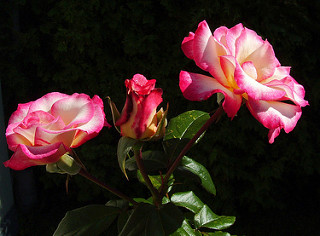

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

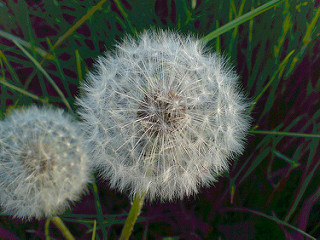

In [ ]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[0]))

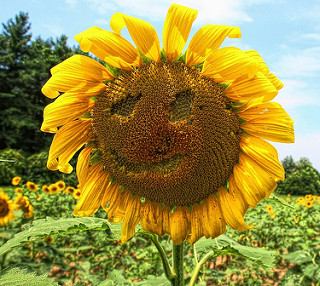

In [ ]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[0]))

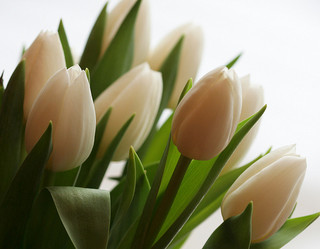

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

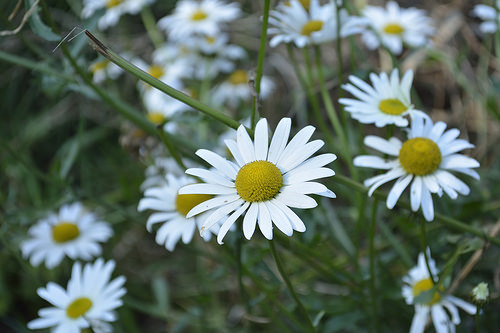

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

In [ ]:
batch_size, img_height, img_width = 32, 180, 180
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


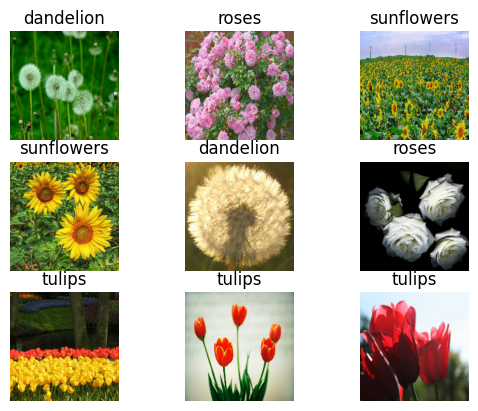

In [ ]:
import matplotlib.pyplot as plt

#fig = make_subplots(rows=3, cols=3)
for images, labels in train_ds.take(1):
  for i in range(9):
    #fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=acc, mode='lines', name="training", marker=dict(color="red")), 1, 1)

    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

In [ ]:
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.3357 - loss: 1.5483 - val_accuracy: 0.5736 - val_loss: 1.0914
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6213 - loss: 0.9996 - val_accuracy: 0.6199 - val_loss: 0.9531
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.6919 - loss: 0.7881 - val_accuracy: 0.6403 - val_loss: 0.9546
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8037 - loss: 0.5540 - val_accuracy: 0.6308 - val_loss: 0.9851
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9046 - loss: 0.3098 - val_accuracy: 0.5926 - val_loss: 1.2544
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9447 - loss: 0.1896 - val_accuracy: 0.5967 - val_loss: 1.6305
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9698 - loss: 0.1041 - val_accuracy: 0.5981 - val_loss: 1.7119
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9842 - loss: 0.0696 - val_accuracy: 0.6158 - v

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=acc, mode='lines', name="training", marker=dict(color="red")), 1, 1)
fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=val_acc, mode='lines', name="validation", marker=dict(color="green")), 1, 1)
fig.update_layout(width=1000,
                  height=500,
                  font_family="Times New Roman",
                  font_color="black",
                  xaxis_title="Epoch",
                  yaxis_title="Accuracy (%)",
                  yaxis_range=[0,1],
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.update_yaxes(title_text="Accuracy (%)", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)
fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=loss, mode='lines', marker=dict(color="red"), showlegend=False), 1, 2)
fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=val_loss, mode='lines', marker=dict(color="green"), showlegend=False), 1, 2)
fig.show()

**Comments**
<br> Data augmentation is a technique used to increase the diversity of the training set by applying random and realistic transformations (translation, rotation, zoom, contract, etc.). For this, pre-processing layers are added to the neural network model.

In [ ]:
data_augmentation = tf.keras.Sequential()
data_augmentation.add(tf.keras.layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),)
data_augmentation.add(tf.keras.layers.RandomRotation(0.1),)
data_augmentation.add(tf.keras.layers.RandomZoom(0.1),)

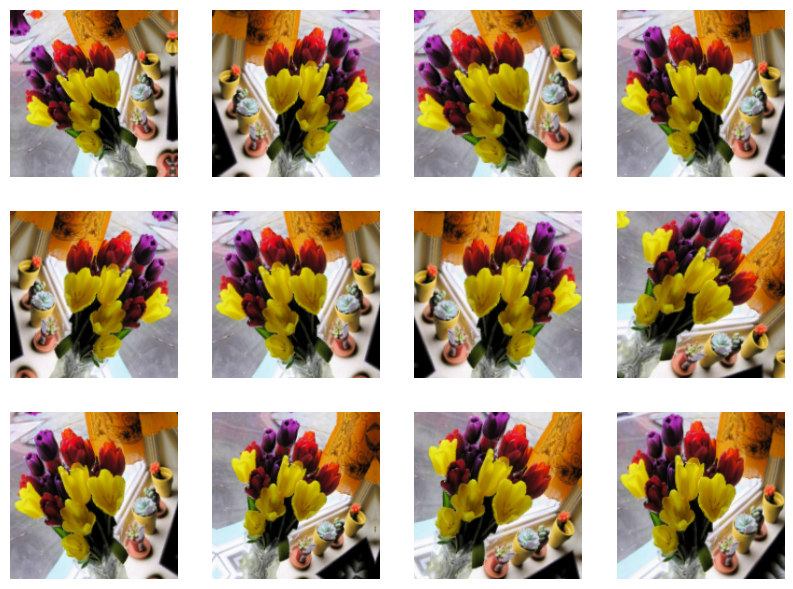

In [ ]:
plt.figure(figsize=(10, 10))
fig = go.make_subplots(rows=4, columns=4)
for images, _ in train_ds.take(1):
  for i in range(12):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.3122 - loss: 1.6032 - val_accuracy: 0.5531 - val_loss: 1.1104
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5440 - loss: 1.1155 - val_accuracy: 0.5695 - val_loss: 1.0463
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.6064 - loss: 1.0035 - val_accuracy: 0.6267 - val_loss: 0.9927
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6211 - loss: 0.9299 - val_accuracy: 0.6471 - val_loss: 0.9017
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6703 - loss: 0.8363 - val_accuracy: 0.6553 - val_loss: 0.8579
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6870 - loss: 0.8063 - val_accuracy: 0.6512 - val_loss: 0.8676
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7123 - loss: 0.7618 - val_accuracy: 0.6757 - val_loss: 0.8096
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7260 - loss: 0.7143 - val_accuracy: 0.6785 - v

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=acc, mode='lines', name="training", marker=dict(color="red")), 1, 1)
fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=val_acc, mode='lines', name="validation", marker=dict(color="green")), 1, 1)
fig.update_layout(width=1000,
                  height=500,
                  font_family="Times New Roman",
                  font_color="black",
                  xaxis_title="Epoch",
                  yaxis_title="Accuracy (%)",
                  yaxis_range=[0,1],
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.update_yaxes(title_text="Accuracy (%)", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)
fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=loss, mode='lines', marker=dict(color="red"), showlegend=False), 1, 2)
fig.add_trace(go.Scatter(x=np.linspace(1,10,10), y=val_loss, mode='lines', marker=dict(color="green"), showlegend=False), 1, 2)
fig.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))

#PIL.Image.open(str(img))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence." .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This image most likely belongs to sunflowers with a 97.28 percent confidence.
